<a href="https://colab.research.google.com/github/ranjuadhikari14/Cifar_10dataset/blob/main/Cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [10]:
(X_train, y_train),(X_test,y_test) =datasets.cifar10.load_data()
X_train.shape
X_test.shape


(50000, 32, 32, 3)

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [19]:
y_train.shape

(50000, 1)

In [20]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [25]:
y_train = y_train.reshape(-1,)
y_train[:5]

In [65]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [66]:
# classes[2]


In [67]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

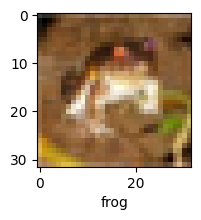

In [68]:
plot_sample(X_train,y_train,0)

normalize

In [69]:
X_train= X_train/255
X_test= X_test/255


ANN

Model building and training

In [45]:
from tensorflow.keras.utils import to_categorical

In [70]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),

])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 170s 108ms/step - accuracy: 0.1157 - loss: 2.3014
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 99ms/step - accuracy: 0.1410 - loss: 2.2999
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 207s 102ms/step - accuracy: 0.1395 - loss: 2.2991
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 209s 106ms/step - accuracy: 0.1329 - loss: 2.2980
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 102ms/step - accuracy: 0.1519 - loss: 2.2970


In [73]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.1856 - loss: 2.2956


[2.2957541942596436, 0.1834000051021576]

In [74]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes =[np.argmax(element)for element in y_pred]

print('classification report :\n ', classification_report(y_test , y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step
classification report :
                precision    recall  f1-score   support

           0       0.21      0.59      0.31      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.13      0.69      0.22      1000
           4       0.00      0.00      0.00      1000
           5       0.82      0.01      0.02      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.28      0.55      0.37      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.18     10000
   macro avg       0.14      0.18      0.09     10000
weighted avg       0.14      0.18      0.09     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CNN to improve model

In [75]:
cnn = models.Sequential([
    #cnn layer
    layers.Conv2D(filters=32, kernel_size=(3,3),activation ='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),


#Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [77]:
cnn.fit(X_train,y_train,epochs=7)

Epoch 1/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.0967 - loss: 2.3028
Epoch 2/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 67ms/step - accuracy: 0.1006 - loss: 2.3027
Epoch 3/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 45ms/step - accuracy: 0.0976 - loss: 2.3028
Epoch 4/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.0999 - loss: 2.3029
Epoch 5/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 46ms/step - accuracy: 0.0972 - loss: 2.3027
Epoch 6/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.1020 - loss: 2.3027
Epoch 7/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 51ms/step - accuracy: 0.0983 - loss: 2.3027


In [78]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0975 - loss: 2.3026


[2.3026344776153564, 0.10000000149011612]

In [79]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

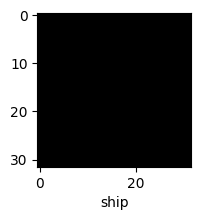

In [80]:

plot_sample(X_test,y_test,1)

In [81]:
y_pred =cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


array([[0.10024597, 0.09794664, 0.10014942, 0.10104758, 0.09900593,
        0.10153032, 0.09987587, 0.10073624, 0.09945966, 0.10000225],
       [0.10024597, 0.09794664, 0.10014942, 0.10104758, 0.09900593,
        0.10153032, 0.09987587, 0.10073624, 0.09945966, 0.10000225],
       [0.10024597, 0.09794664, 0.10014942, 0.10104758, 0.09900593,
        0.10153032, 0.09987587, 0.10073624, 0.09945966, 0.10000225],
       [0.10024597, 0.09794664, 0.10014942, 0.10104758, 0.09900593,
        0.10153032, 0.09987587, 0.10073624, 0.09945966, 0.10000225],
       [0.10024597, 0.09794664, 0.10014942, 0.10104758, 0.09900593,
        0.10153032, 0.09987587, 0.10073624, 0.09945966, 0.10000225]],
      dtype=float32)

In [82]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5)]

In [83]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

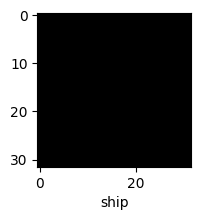

In [84]:
plot_sample(X_test,y_test,1)

In [71]:
classes

'ship'